<a href="https://colab.research.google.com/github/ishanjogalekar/DataSets/blob/main/Valorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valorization - Data visualization on Valorant Datasets

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
%matplotlib inline
import seaborn as sns
import re

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

**Data Loading**

In [3]:
# csv links
player_stats = "https://raw.githubusercontent.com/ishanjogalekar/DataSets/main/Valo-Dataset/player_stats.csv"
side_pick = "https://raw.githubusercontent.com/ishanjogalekar/DataSets/main/Valo-Dataset/side_pick_stats.csv"
map_pick = "https://raw.githubusercontent.com/ishanjogalekar/DataSets/main/Valo-Dataset/map_pick_stats.csv"
banned_map = "https://raw.githubusercontent.com/ishanjogalekar/DataSets/main/Valo-Dataset/banned_maps_stats.csv"
weapon_stats = "https://raw.githubusercontent.com/ishanjogalekar/DataSets/main/Valo-Dataset/weapon-stats.csv"

# Dataframes creation
ps = pd.read_csv(player_stats,on_bad_lines='skip') 
sp = pd.read_csv(side_pick,on_bad_lines='skip')
ms = pd.read_csv(map_pick,on_bad_lines='skip')
bm = pd.read_csv(banned_map,on_bad_lines='skip')
ws = pd.read_csv(weapon_stats,on_bad_lines='skip')

**Heads of all dataframes**

In [4]:
ps.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [5]:
sp.head()

,Map,Atk Wins,Def Wins
0,Ascent,96,130
1,Bind,74,55
2,Haven,130,105
3,Icebox,99,88
4,Split,44,53


In [6]:
ms.head()

,Map,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,Ascent,16,3,3,2,3,2,2,1
1,Bind,9,1,0,2,1,2,2,1
2,Haven,15,3,3,2,2,3,1,1
3,Icebox,10,2,2,3,1,1,0,1
4,Split,6,0,1,0,2,1,1,1


In [7]:
bm.head()

,Map,Total,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,Ascent,2,0,0,1,0,1,0,0
1,Bind,9,2,3,1,2,1,0,0
2,Haven,3,0,0,1,1,0,1,0
3,Icebox,8,1,1,0,2,2,2,0
4,Split,12,3,2,3,1,2,1,0


In [8]:
ws.head()

,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43


### Barplots

**Player and Kill Barplot**

[Text(0.5, 1.0, 'Top player and their deaths')]

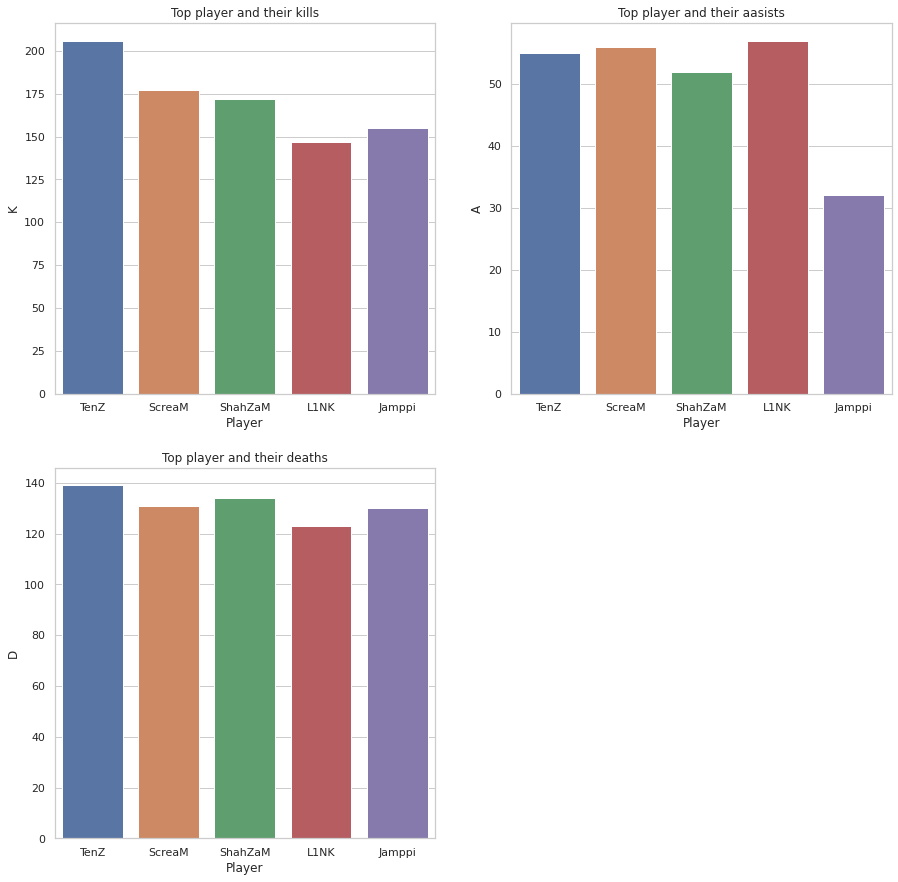

In [9]:
plt.figure(figsize=(15,15))
sns.set_theme(style='whitegrid')
df = ps.head()
plt.subplot(2,2,1)
sns.barplot(data=df,y='K',x='Player').set(title = "Top player and their kills")
plt.subplot(2,2,2)
sns.barplot(data=df,y='A',x='Player').set(title = "Top player and their aasists")
plt.subplot(2,2,3)
sns.barplot(data=df,y='D',x='Player').set(title = "Top player and their deaths")

[Text(0.5, 1.0, 'Player and their KDA')]

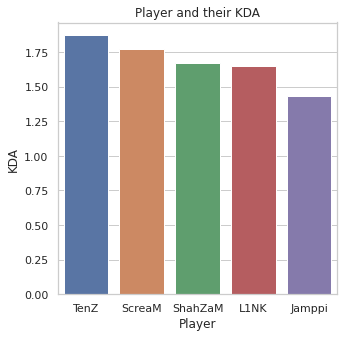

In [10]:
plt.figure(figsize=(5,5))
sns.set_theme(style='whitegrid')
sns.barplot(data=df,y='KDA',x='Player').set(title = "Player and their KDA")

**Banned map plots**

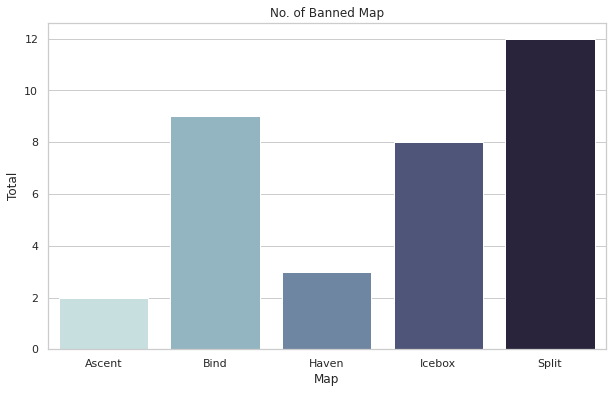

In [11]:
plt.figure(figsize = (10,6))
plt.title("No. of Banned Map")
sns.barplot(x="Map",y="Total",data=bm, palette= "ch:start=.2,rot=-.3")
plt.show()

**Selected map plots**

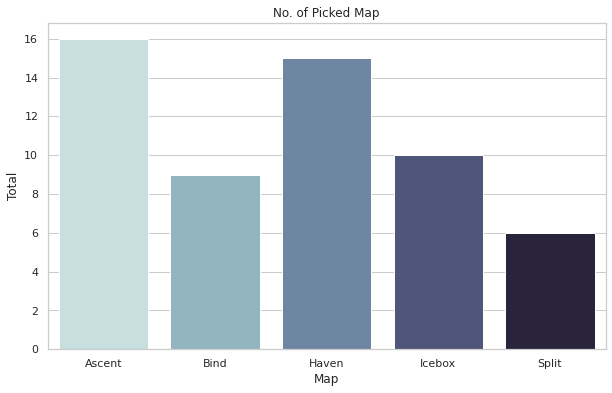

In [12]:
plt.figure(figsize = (10,6))
plt.title("No. of Picked Map")
sns.barplot(x="Map",y="Total",data=ms, palette= "ch:start=.2,rot=-.3")
plt.show()

**Line plots**

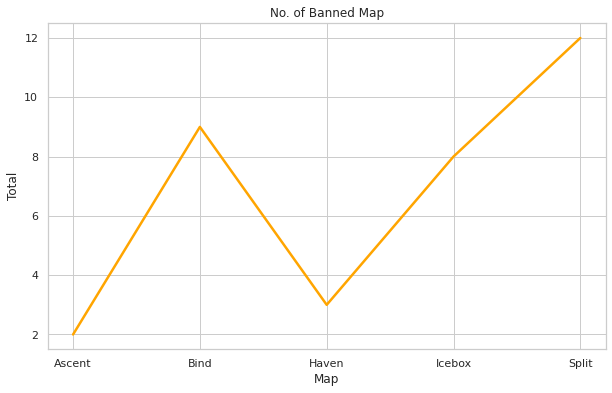

In [13]:
plt.figure(figsize = (10,6))
plt.title("No. of Banned Map")
sns.lineplot(x="Map",y="Total",data=bm,color='orange',linewidth=2.5)
plt.show()

**KDE of wins**

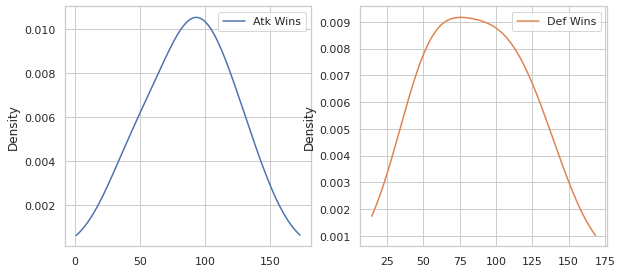

In [14]:
sp.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(15,15))
plt.show()

---

### Waepon stats plots

**Pie chart of waepon types**

In [15]:
weapon_type = dict(Counter(ws['Weapon Type']))
weapon_type = {'Weapon Type': list(weapon_type.keys()), 'count': list(weapon_type.values())}

fig_weapon = px.pie(weapon_type, values = 'count', names = 'Weapon Type', title = 'Weapon Type Distribution', hole = .5, color_discrete_sequence = px.colors.sequential.Agsunset)
fig_weapon.show()

**Pie chart - Wall penetration of weapons**

In [16]:
pen_type = dict(Counter(ws['Wall Penetration']))
pen_type = {'Penetration': list(pen_type.keys()), 'count': list(pen_type.values())}

colors_pie = ['#fed330', '#20bf6b', '#eb3b5a']

fig_pen = px.pie(pen_type, values = 'count', names = 'Penetration', title = 'Penetration Distribution', hole = .5, color_discrete_sequence = colors_pie)
fig_pen.show()

**Headshots by waepons bar plot**

In [17]:
def return_sorted(col_name, asc = False, limit = 5):
    sorted_df = ws.sort_values(by=col_name, ascending=asc)
    sorted_df = sorted_df[:limit]

    return {'weapon': sorted_df['Name'].to_list(), 'values': sorted_df[col_name].to_list()}

In [18]:
headshot_dict = return_sorted('HDMG_0', limit = 10)
num_ele = len(headshot_dict['weapon'])
colors = ['#22a6b3',] * num_ele
colors[0] = '#eb4d4b'

fig_headshot = go.Figure(data=[go.Bar(
    x=headshot_dict['weapon'],
    y=headshot_dict['values'],
    marker_color = colors
)])

fig_headshot.update_traces(texttemplate='%{y:}', textposition='outside')

fig_headshot.update_layout(
    title = 'Damage given by a headshot',
    yaxis=dict(
        title='Damage',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=800,
    height=800
)

fig_headshot.show()

**Line plot for waepons**

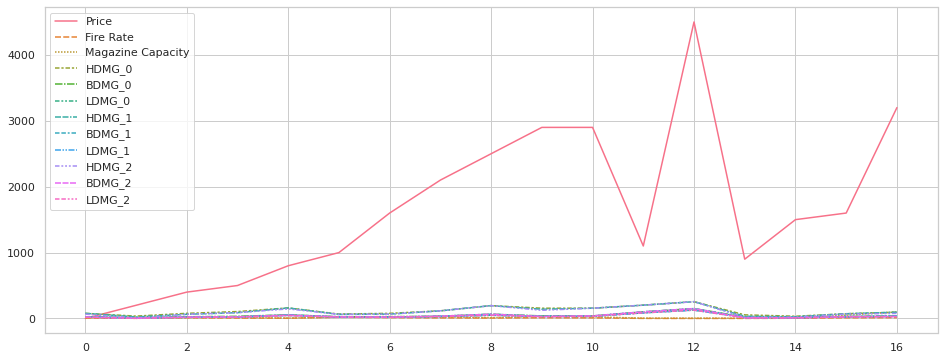

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=ws)

Text(0.5, 0, 'Name')

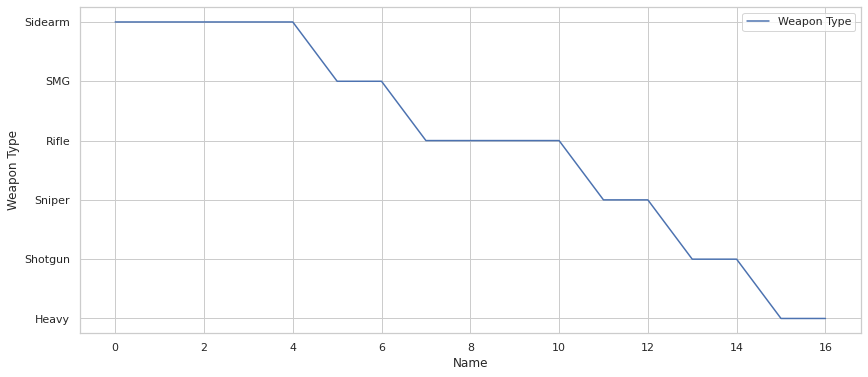

In [20]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=ws['Weapon Type'], label="Weapon Type")
plt.xlabel('Name')

**Scatter plots**

[Text(0.5, 1.0, 'Weapon & Damage')]

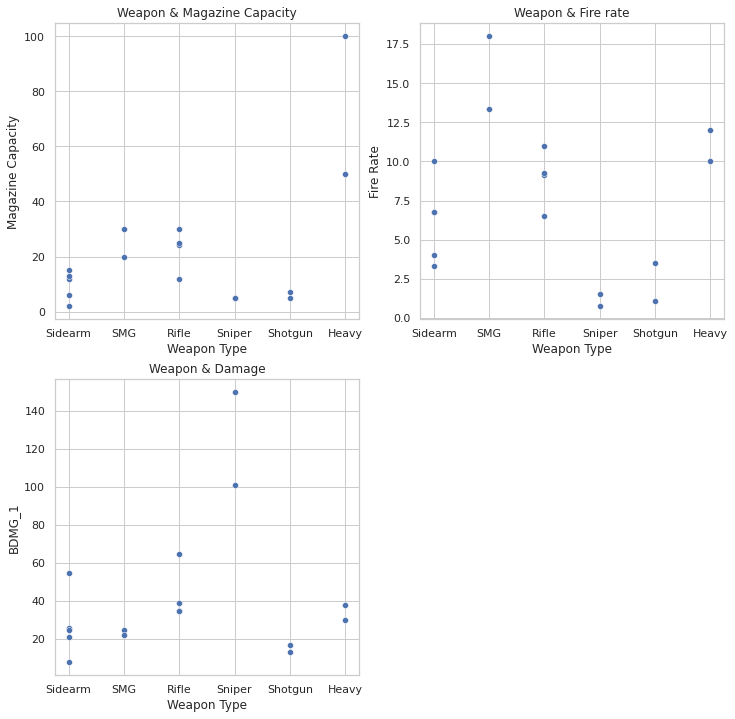

In [21]:
plt.figure(figsize=(12,12))
sns.set_theme(style='whitegrid')
df = ps.head()
plt.subplot(2,2,1)
sns.scatterplot(x=ws['Weapon Type'], y=ws['Magazine Capacity']).set(title = "Weapon & Magazine Capacity")
plt.subplot(2,2,2)
sns.scatterplot(x=ws['Weapon Type'],y=ws['Fire Rate']).set(title = "Weapon & Fire rate")
plt.subplot(2,2,3)
sns.scatterplot(x=ws['Weapon Type'], y=ws['BDMG_1']).set(title = "Weapon & Damage")

**Weapon Prices KDE**

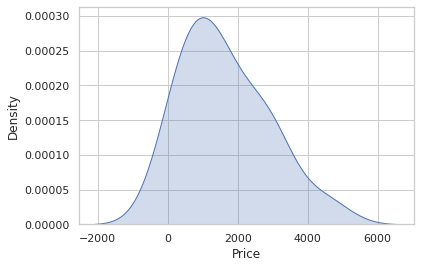

In [22]:
sns.kdeplot(data=ws['Price'], shade=True)